<a href="https://colab.research.google.com/github/LaurensEiroa/Feed-Forward-Neural-Network-from-scratch/blob/master/ANN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import needed libraries.

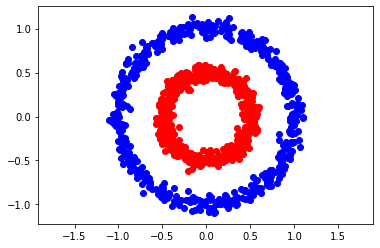

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

Create classification input data.

In [0]:
input_samples = 1000
X, Y = make_circles(n_samples=input_samples, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]



Input data plot.


In [0]:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="b")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="r")
plt.axis("equal")
plt.show()

Class an functions designated for creating the ANN model

In [0]:
class layer:
    def __init__(self, _connections, _neurons):
        self.bias = np.random.uniform(0, 0.5, (1, _neurons))
        self.weights = np.random.uniform(-1, 1, (_connections, _neurons))


def create_model(_topo):
    model = []
    for l in range(len(_topo) - 1):
        model.append(layer(_topo[l], _topo[l + 1]))
    return model

Forward and backward passes.


In [0]:
def forward_pass(model, X, f):
    neural_values = [X]
    for l in range(len(model)):
        neuron_input = neural_values[l] @ model[l].weights + model[l].bias
        activation = f(neuron_input)
        neural_values.append(activation)
    return neural_values


def backward_pass(model, X, Y, cost, df, neural_values, lr):
    for l in reversed(range(1, len(neural_values))):
        activation = neural_values[l]
        previous_layer_activation = neural_values[l-1]
        if l == len(neural_values)-1:
            error = cost(activation, Y) * df(activation)
        else:
            error = error @ model[l].weights.T * df(activation)
        # Adjust weights and biases using the backpropagation algorithm
        model[l-1].weights -= lr * previous_layer_activation.T @ error
        model[l-1].bias -= lr * np.mean(error, axis=0, keepdims=True)


def train(model, X, Y, l2_cost, f, df, lr=0.01, train=True):
    neural_values = forward_pass(model, X, f)
    if train:
        backward_pass(model, X, Y, l2_cost, df, neural_values, lr)
    return neural_values[-1]

Loss and activation functions and its derivates.

In [0]:
sigm = lambda x: 1 / (1 + np.exp(-x))
sigm_err = lambda x: sigm(x) * (1 - sigm(x))
l2_cost = lambda Yp, Yr: np.mean((Yp - Yr) ** 2)
l2_cost_back = lambda Yp, Yr: np.abs(Yp - Yr)



Topology and cretion of the model



In [0]:
topology = [input_nodes, 4, 6, 1]
neural_net = create_model(topology)

Train the model

In [0]:
training_epochs = 500000
interval = 1000
loss = []
for i in range(training_epochs):
    result = train(neural_net, X, Y, l2_cost_back, sigm, sigm_err, lr=0.01)
    if i % interval == 0:
        loss.append(l2_cost(result, Y))
        print(loss[-1])

0.1350378858469902
0.12670300439837484
0.09498619923192984
0.05798071429229464
0.027721384685939075
0.010215468819871043
0.006356180700595194
0.003962659823370813
0.001713469625821964
0.0007182548558454644
0.0004691494539162533
0.000368516201199702
0.00030813636020039244
0.00026640334285837056
0.00023541392756671787
0.00021132518881233434
0.0001919804704467626
0.0001760580877593637
0.00016269588618640033
0.00015130416034310538
0.00014146424858584668
0.0001328698837149446
0.00012529144492256147
0.00011855320528767357
0.00011251831822260297
0.00010707860346634836
0.00010214741360663463
9.765453660301357e-05
9.354247873972987e-05
8.976370523214607e-05
8.627855952366612e-05
8.305367344550819e-05
8.006073927150986e-05
7.727555323823973e-05
7.46772656331521e-05
7.22477897280685e-05
6.997133366131949e-05
6.783402778679912e-05
6.582362622522655e-05
6.39292661032879e-05
6.214127167831358e-05
6.04509934726291e-05
5.885067484340664e-05
5.733334020695832e-05
5.589270051560457e-05
5.452307263248703

Obtained loss in function of the epoch during the training.

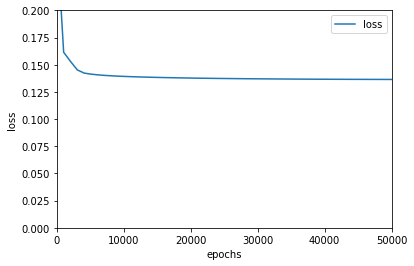

In [0]:
epochs = np.linspace(0,len(loss)*interval,len(loss))
plt.plot(epochs,np.array(loss),label="loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.axis([0,len(loss)*interval,0,0.2])
plt.legend()
plt.show()

Visualization of the area designated for each of the two classes.

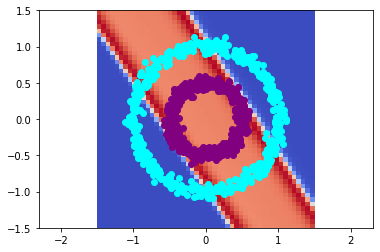

In [0]:
_x0 = np.linspace(-1.5, 1.5, 50)
_x1 = np.linspace(-1.5, 1.5, 50)
_Y = np.zeros((50,50))
for i,x0 in enumerate(_x0):
    for j,x1 in enumerate(_x1):
        _Y[i, j] = train(neural_net,[x0,x1],Y=None,l2_cost=None,f=sigm,df=None,train=False)

plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
plt.axis("equal")
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="cyan")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="purple")
plt.show()